In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/am/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
%%bash
ls

2000-2019SENTINEL_2A_383242.csv
ethiopia
ethiopia.geojson
LANDSAT_8_C1_383244.csv
NDVI_SWEthiopia_with_Mosaic.ipynb
RasterVision.ipynb
SENTINEL_2A_382286.csv
Sentinel2A_Landsat8_comparison.ipynb
sentinel2MetaDataExtract.ipynb
Untitled.ipynb


### Landsat-8

In [3]:
pd.read_csv('LANDSAT_8_C1_383244.csv').columns

Index(['Landsat Product Identifier', 'Landsat Scene Identifier',
       'Acquisition Date', 'Collection Category', 'Collection Number',
       'WRS Path', 'WRS Row', 'Target WRS Path', 'Target WRS Row',
       'Nadir/Off Nadir', 'Roll Angle', 'Date L-1 Generated', 'Start Time',
       'Stop Time', 'Station Identifier', 'Day/Night Indicator',
       'Land Cloud Cover', 'Scene Cloud Cover', 'Ground Control Points Model',
       'Ground Control Points Version', 'Geometric RMSE Model (meters)',
       'Geometric RMSE Model X', 'Geometric RMSE Model Y', 'Image Quality',
       ' Processing Software Version', 'Sun Elevation L1', 'Sun Azimuth L1',
       'TIRS SSM Model', 'Data Type Level-1', 'Sensor Identifier',
       'Panchromatic Lines', 'Panchromatic Samples', 'Reflective Lines',
       'Reflective Samples', 'Thermal Lines', 'Thermal Samples',
       'Map Projection Level-1', 'UTM Zone', 'Datum', 'Ellipsoid',
       'Grid Cell Size Panchromatic', 'Grid Cell Size Reflective',
       'Grid

In [4]:
landsatMetaData = pd.read_csv('LANDSAT_8_C1_383244.csv',
                             usecols=['Acquisition Date',
                                      'Scene Cloud Cover', 
                                      'Landsat Scene Identifier'
                                     ],
                              parse_dates=['Acquisition Date'],
                              date_parser= lambda x: pd.to_datetime(x).date 
                             )
landsatMetaData = landsatMetaData.rename(columns={'Acquisition Date':'Date', 'Landsat Scene Identifier':'Scene', 'Scene Cloud Cover':'Landsat8 CCP'})
landsatMetaData = landsatMetaData.assign(Month= landsatMetaData['Date'].dt.strftime('%b'), Year= landsatMetaData['Date'].dt.strftime('%Y'))

In [5]:
landsatMetaData.head()
landsatMetaData['Date'].unique()

array(['2020-01-01T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', ...,
       '2013-03-22T00:00:00.000000000', '2013-03-12T00:00:00.000000000',
       '2013-03-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
lsg = pd.DataFrame(landsatMetaData.groupby(['Year', 'Month'])['Landsat8 CCP'].mean())
lsg

Landsat8 CCP
Year Month              
2013 Apr       32.512185
     Aug       53.779746
     Dec        5.648045
     Jul       57.006457
     Jun       43.364286
...                  ...
2019 May       35.162313
     Nov       30.525520
     Oct       35.860522
     Sep       41.025827
2020 Jan        3.045000

[83 rows x 1 columns]

### Sentinel-2A

In [7]:
pd.read_csv('2000-2019SENTINEL_2A_383242.csv').columns

Index(['Entity ID', 'Acquisition Start Date', 'Acquisition End Date',
       'Tile Number', 'Cloud Cover', 'Agency', 'Platform', 'Vendor',
       'Vendor Tile ID', 'Orbit Number', 'Orbit Direction',
       'Vendor Software Version', 'Production Date', 'Vendor Product ID',
       'Archiving Center', 'Datatake Type', 'Datatake Identifier', 'Data Type',
       'Product Type', 'Product Format', 'Processing Level', 'Datastrip ID',
       'Datum', 'Map Projection', 'UTM Zone', 'EPSG Code', 'Resolution',
       'Units', 'Sun Zenith Angle Mean', 'Sun Azimuth Angle  Mean',
       'Quantification', 'Center Latitude', 'Center Longitude',
       'NW Corner Lat', 'NW Corner Long', 'NE  Corner Lat', 'NE  Corner Long',
       'SE Corner Lat', 'SE Corner Long', 'SW Corner Lat', 'SW Corner Long',
       'Center Latitude dec', 'Center Longitude dec', 'NW  Corner Lat dec',
       'NW Corner Long dec', 'NE Corner Lat dec', 'NE Corner Long dec',
       'SE Corner Lat dec', 'SE Corner Long dec', 'SW Corner 

In [8]:
sentMetaData = pd.read_csv('2000-2019SENTINEL_2A_383242.csv',
                  usecols=['Acquisition End Date',
                           'Tile Number', 
                           'Cloud Cover'
                          ], 
                  parse_dates=['Acquisition End Date'], 
                  date_parser = lambda x: pd.to_datetime(x).date
                  )
sentMetaData = sentMetaData.rename(columns={'Acquisition End Date':'Date','Cloud Cover':'Sentinel2A CCP'})
sentMetaData = sentMetaData.assign(Month= sentMetaData['Date'].dt.strftime('%b'), Year= sentMetaData['Date'].dt.strftime('%Y'))
sentMetaData.columns

Index(['Date', 'Tile Number', 'Sentinel2A CCP', 'Month', 'Year'], dtype='object')

In [9]:
sg = pd.DataFrame(sentMetaData.groupby(['Year','Month'])['Sentinel2A CCP'].mean())
sg

Sentinel2A CCP
Year Month                
2015 Aug         12.939167
     Dec         17.546288
     Jul         63.309343
     Nov         18.126287
     Oct         30.288529
     Sep         23.137146
2016 Apr         33.887646
     Aug         38.476306
     Dec          5.895362
     Feb          8.620289
     Jan         18.238465
     Jul         35.920143
     Jun         44.675960
     Mar         20.217963
     May         30.260765
     Nov         24.118388
     Oct         24.356796
     Sep         28.930739
2017 Apr         27.489042
     Aug         45.188935
     Dec          5.592668
     Feb         25.460602
     Jan         14.297464
     Jul         44.318949
     Jun         30.938183
     Mar         13.992761
     May         39.404451
     Nov         19.949505
     Oct         29.749978
     Sep         32.781376
2018 Apr         39.935772
     Aug         29.504191
     Dec         12.382874
     Feb         18.641205
     Jan          6.253934
     Jul         34.451212
     Jun         36.388356
     Mar         22.553589
     May         37.674156
     Nov         20.048352
     Oct         21.219901
     Sep         18.918520
2019 Apr         29.075113
     Aug         44.657012
     Dec         15.659897
     Feb         13.802745
     Jan          5.667734
     Jul         43.124433
     Jun         42.518869
     Mar         14.629955
     May         32.089651
     Nov         34.971615
     Oct         35.969425
     Sep         36.263874

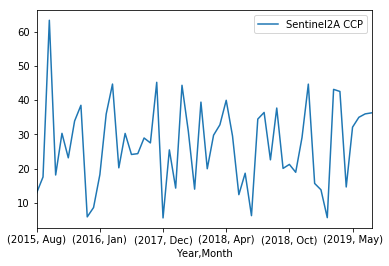

In [10]:
sg.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c55e42080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2c55d308d0>], dtype=object)

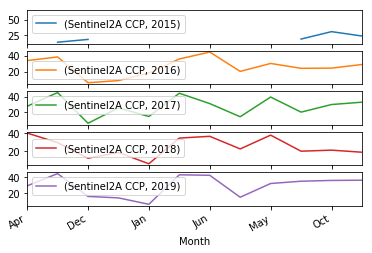

In [11]:
sg.unstack(level=0).plot(subplots=True)

In [12]:
s2A_ls8 = pd.merge(sg, lsg, left_index=True, right_index=True)
s2A_ls8 = s2A_ls8.drop(s2A_ls8.index[1][0])

In [13]:
import matplotlib.pyplot as plt

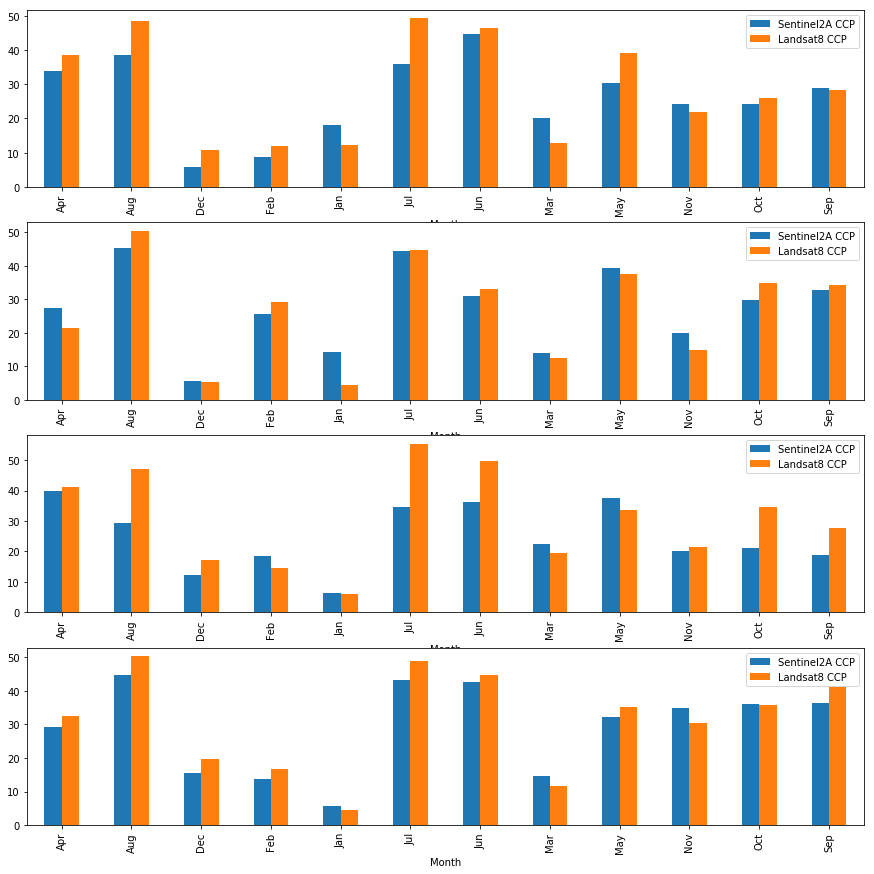

In [14]:
f, a = plt.subplots(4,1)
f.set_figheight(15)
f.set_figwidth(15)
s2A_ls8.xs('2016').plot(kind='bar', ax = a[0])
s2A_ls8.xs('2017').plot(kind='bar',ax = a[1])
s2A_ls8.xs('2018').plot(kind='bar',ax = a[2])
s2A_ls8.xs('2019').plot(kind='bar',ax = a[3])

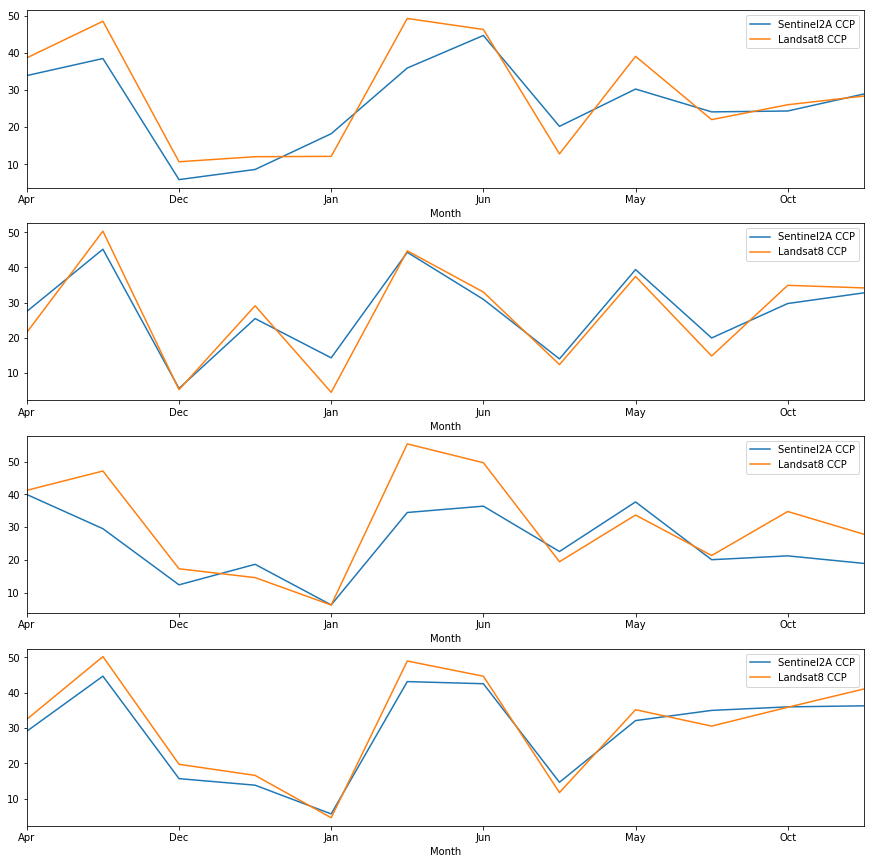

In [15]:
f, a = plt.subplots(4,1)
f.set_figheight(15)
f.set_figwidth(15)
s2A_ls8.xs('2016').plot(ax = a[0])
s2A_ls8.xs('2017').plot(ax = a[1])
s2A_ls8.xs('2018').plot(ax = a[2])
s2A_ls8.xs('2019').plot(ax = a[3])